# The Battle of Neighborhoods - Capstone Project

In [2]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plots
import seaborn as sns # for regression plots and boxplots

## House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [2]:
# import house sales dataset
house_sales = pd.read_csv('kc_house_data.csv')

In [3]:
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_sales.shape

(21613, 21)

In [97]:
#check data types
house_sales.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [6]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Foursquare Location Data 

Ideally I would like to collect location data for each house in the house sales data set, but I only have 900 request per day for the Foursquare API so I need to reduce the number of locations to get information from. I have the zip codes in the data set so I can collect the location data for each zip code instead. 

In [4]:
#change datatype on zipcode
house_sales['zipcode']=house_sales['zipcode'].astype('category')

In [5]:
house_sales.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,98103.0,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,602.0,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,NaN,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,NaN,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,NaN,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,NaN,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,NaN,47.678000,-122.125000,2360.000000,10083.000000


I use the group by function to get the average latitude and longitude for the listed houses in each zipcode, that should be good enough. 

In [6]:
# calculate latitude and longitude
zipcodes=house_sales.groupby('zipcode').mean().reset_index()

In [7]:
# keeping only the columns I need
zipcodes=zipcodes[['zipcode','lat','long']]

In [8]:
zipcodes

,zipcode,lat,long
0,98001,47.309020,-122.270646
1,98002,47.308780,-122.213357
2,98003,47.315741,-122.310054
3,98004,47.616183,-122.205189
4,98005,47.611532,-122.167268
...,...,...,...
65,98177,47.742381,-122.369282
66,98178,47.499118,-122.246969
67,98188,47.447310,-122.280993
68,98198,47.390788,-122.315743


## Importing the Foursquare data

In [15]:
import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import requests # library to handle requests

In [18]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 #maximum nuber of venues returned

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
my_venues = getNearbyVenues(names=zipcodes['zipcode'],
                                   latitudes=zipcodes['lat'],
                                   longitudes=zipcodes['long']
                                  )

98001
98002
98003
98004
98005
98006
98007
98008
98010
98011
98014
98019
98022
98023
98024
98027
98028
98029
98030
98031
98032
98033
98034
98038
98039
98040
98042
98045
98052
98053
98055
98056
98058
98059
98065
98070
98072
98074
98075
98077
98092
98102
98103
98105
98106
98107
98108
98109
98112
98115
98116
98117
98118
98119
98122
98125
98126
98133
98136
98144
98146
98148
98155
98166
98168
98177
98178
98188
98198
98199


In [26]:
my_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,98001,47.30902,-122.270646,Centennial View Point Park,47.306903,-122.266138,Park
1,98002,47.30878,-122.213357,Athens Pizza and Pasta,47.308102,-122.216465,Italian Restaurant
2,98002,47.30878,-122.213357,Mom's Teriyaki,47.308523,-122.214112,Japanese Restaurant
3,98002,47.30878,-122.213357,Frank Fulmer Park,47.312361,-122.215185,Park
4,98002,47.30878,-122.213357,Indian Tom Park,47.312987,-122.211910,Park


In [15]:
my_venues.shape

(739, 7)

In [16]:
#check how many venues we recieved for each neighborhood
number_of_venues=my_venues.groupby('Neighborhood').count()

In [17]:
number_of_venues=number_of_venues[['Venue Category']]

In [18]:
number_of_venues.reset_index(inplace=True)

In [19]:
number_of_venues=number_of_venues.rename({'Neighborhood': 'zipcode', 'Venue Category': 'Number of Venues'}, axis='columns')

In [20]:
number_of_venues

,zipcode,Number of Venues
0,98001,1
1,98002,4
2,98003,100
3,98004,82
4,98005,4
...,...,...
58,98177,3
59,98178,7
60,98188,3
61,98198,4


## Create variables for each venue category

In [21]:
# one hot encoding
onehot = pd.get_dummies(my_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['zipcode'] = my_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head(15)

,zipcode,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,98001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,98002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,98003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,98003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,98003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,98003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,98003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Count of venues

In [22]:
#summarize number of venues in each category for each zip code
venues_grouped = onehot.groupby('zipcode').sum().reset_index()
venues_grouped.head()

,zipcode,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,98001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,98003,0,3,0,0,0,1,0,0,0,...,0,2,0,2,0,1,0,1,0,0
3,98004,1,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
4,98005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
venues_grouped.describe()

,zipcode,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,98080.952381,0.047619,0.111111,0.015873,0.015873,0.015873,0.063492,0.079365,0.015873,0.031746,...,0.031746,0.031746,0.126984,0.158730,0.015873,0.015873,0.015873,0.031746,0.111111,0.015873
std,57.641951,0.214669,0.478947,0.125988,0.125988,0.125988,0.304431,0.272479,0.125988,0.176731,...,0.176731,0.251976,0.335630,0.601245,0.125988,0.125988,0.125988,0.176731,0.571108,0.125988
min,98001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98031.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,98070.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98120.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98199.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
venues_grouped.shape

(63, 204)

Add neighborhoods that did not have any venues to dataframe

In [24]:
#change datatype on zipcode
venues_grouped['zipcode']=venues_grouped['zipcode'].astype('int64')

In [25]:
zipcodes.shape

(70, 3)

In [26]:
# Join tables
pca_data = pd.merge(zipcodes, venues_grouped, on='zipcode', how='outer')

In [27]:
pca_data.head()

,zipcode,lat,long,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,98001,47.309020,-122.270646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98002,47.308780,-122.213357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98003,47.315741,-122.310054,0.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
3,98004,47.616183,-122.205189,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,98005,47.611532,-122.167268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
pca_data.shape

(70, 206)

In [31]:
pca_data.describe()

,zipcode,lat,long,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,98077.300000,47.553582,-122.210749,0.042857,0.100000,0.014286,0.014286,0.014286,0.057143,0.071429,...,0.028571,0.028571,0.114286,0.142857,0.014286,0.014286,0.014286,0.028571,0.100000,0.014286
std,56.622408,0.137561,0.150644,0.203997,0.455243,0.119523,0.119523,0.119523,0.289213,0.259399,...,0.167802,0.239046,0.320455,0.571946,0.119523,0.119523,0.119523,0.167802,0.542405,0.119523
min,98001.000000,47.211450,-122.463822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98029.250000,47.456075,-122.320621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,98067.500000,47.559702,-122.239784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98117.750000,47.668609,-122.133743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98199.000000,47.755192,-121.759036,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The houses from the zipcodes where we did not get any venues have missing values - have to fix that by setting NaN to zero

In [30]:
#replace NaN with 0
pca_data.fillna(value=0,axis=0,inplace=True)

## PCA

In [42]:
#data utan zipcode
pca_data2=pca_data.drop(columns=['zipcode','lat','long'])
#data_test=venues_grouped[['ATM','Supermarket','Yoga Studio','Scenic Lookout']]

In [43]:
pca_data2.head()

,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
pca_data2.shape

(70, 203)

#### Standardize the data

In [45]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
pca_data3 = StandardScaler().fit_transform(pca_data2)
pca_data3

#scaler = StandardScaler()
# Fit on training set only.
#scaler.fit(pca_data)
# Apply transform to both the training set and the test set.
#pca_data = scaler.transform(pca_data)
#pca_data

array([[-0.21160368, -0.22124884, -0.12038585, ..., -0.17149859,
        -0.18569534, -0.12038585],
       [-0.21160368, -0.22124884, -0.12038585, ..., -0.17149859,
        -0.18569534, -0.12038585],
       [-0.21160368,  6.41621634, -0.12038585, ...,  5.83095189,
        -0.18569534, -0.12038585],
       ...,
       [-0.21160368, -0.22124884, -0.12038585, ..., -0.17149859,
        -0.18569534, -0.12038585],
       [-0.21160368, -0.22124884, -0.12038585, ..., -0.17149859,
        -0.18569534, -0.12038585],
       [-0.21160368, -0.22124884, -0.12038585, ..., -0.17149859,
        -0.18569534, -0.12038585]])

#### Deciding on number of principal components to use

In [46]:
# import PCA
from sklearn.decomposition import PCA

In [47]:
# Make an instance of the Model
pca = PCA()  #account for all the variance in the dataset

In [48]:
#fit data
pca.fit(pca_data3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
# check number of PCs
pca.n_components_

70

In [50]:
#get eigenvalues
pc=pca.explained_variance_

In [51]:
#sum to get total
pc_sum=pc.sum()

In [52]:
#get proportion of explained variance for each PC
pc_var_prop=pc/pc_sum

In [53]:
pc_var_prop

array([1.76901808e-01, 1.18706774e-01, 8.68045152e-02, 5.69295591e-02,
       4.34844147e-02, 3.91698777e-02, 3.46235406e-02, 3.01234979e-02,
       2.83956239e-02, 2.65406424e-02, 2.52624666e-02, 2.46198960e-02,
       2.03578240e-02, 1.90183297e-02, 1.67146997e-02, 1.57392466e-02,
       1.54997242e-02, 1.38617082e-02, 1.34378281e-02, 1.23459073e-02,
       1.16679661e-02, 1.10502918e-02, 1.07315068e-02, 1.01438458e-02,
       9.99821015e-03, 9.99500250e-03, 8.87428411e-03, 8.53012839e-03,
       8.32562688e-03, 7.10588768e-03, 6.54374025e-03, 6.21928472e-03,
       6.12005778e-03, 5.97190280e-03, 5.66838326e-03, 5.40955834e-03,
       5.27054165e-03, 5.21950847e-03, 4.52434977e-03, 4.03938868e-03,
       3.47195253e-03, 3.29338293e-03, 2.96036001e-03, 2.79335545e-03,
       2.32816257e-03, 2.25773374e-03, 2.08759033e-03, 1.82518367e-03,
       1.46176104e-03, 1.38481533e-03, 1.34182334e-03, 1.09412999e-03,
       9.72473022e-04, 8.00524036e-04, 7.35059155e-04, 4.98587316e-04,
      

([<matplotlib.axis.XTick at 0x1921e8459c8>,
 <a list of 15 Text xticklabel objects>)

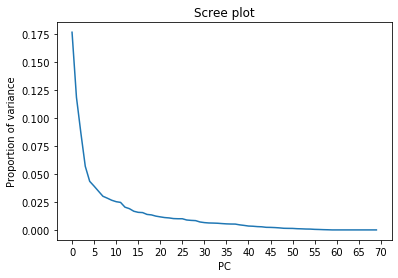

In [54]:
#create scree plot
#plt.figure(figsize=(10,7))
plt.plot(pc_var_prop)
plt.title('Scree plot')
plt.xlabel('PC')
plt.ylabel('Proportion of variance')
plt.xticks(np.arange(0, 71, 5))

In [55]:
#cumulative sum om proportion of variance explained
pc_cumsum=np.cumsum(pc_var_prop)

([<matplotlib.axis.YTick at 0x1921facf188>,
 <a list of 11 Text yticklabel objects>)

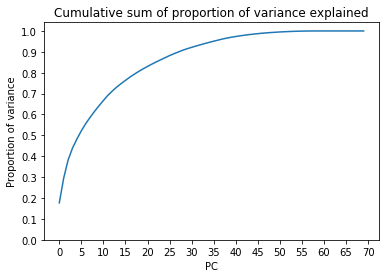

In [56]:
#plot cumulative sum of proportion of variance explained
plt.plot(pc_cumsum)
plt.title('Cumulative sum of proportion of variance explained')
plt.xlabel('PC')
plt.ylabel('Proportion of variance')
plt.xticks(np.arange(0, 71, 5))
plt.yticks(np.arange(0, 1.1, 0.1))

### Run PCA

In [57]:
# Make an instance of the Model
pca = PCA(n_components=4) #use 4 components

In [58]:
#fit model
pca.fit(pca_data3)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### How the PCs are calculated (linear combination of original variables)

In [59]:
print(pca.components_)

[[ 8.16186589e-02  1.30853579e-01 -5.34419960e-03  1.11348905e-01
   1.11348905e-01  9.03775638e-02 -1.49540106e-03 -5.34419960e-03
   1.03214668e-02  9.51746083e-02  6.42869605e-02  2.53781556e-02
   1.47104038e-01  6.10272731e-02 -9.43902578e-03  2.82905545e-03
   9.51746083e-02 -4.24798495e-03  2.31332146e-03 -2.69926168e-03
   9.51746083e-02  7.71729657e-02 -7.29502546e-03  1.11348905e-01
  -5.27337159e-04  3.50624279e-02  7.73897415e-02 -5.30928507e-03
   1.03439207e-01  9.51746083e-02  2.82905545e-03 -4.18854174e-03
  -8.50404643e-03 -8.53483512e-03  1.28211411e-01 -7.29502546e-03
   7.30091945e-04 -2.69926168e-03  1.11348905e-01  6.87820201e-02
   6.42869605e-02  1.57987497e-01 -6.42617378e-03  1.11348905e-01
   9.59544483e-02 -1.93053009e-02 -1.41746734e-03  1.46308489e-01
   4.55412771e-04 -2.99259033e-03  6.42869605e-02  1.11348905e-01
  -6.86371020e-03 -6.55575896e-03  9.51746083e-02  7.57905293e-02
   8.26988270e-02  3.25680550e-02 -3.41887569e-03  9.24550225e-02
   1.11348

In [60]:
#get names of columns
col=list(pca_data2.columns) 

In [61]:
col

['ATM',
 'American Restaurant',
 'Antique Shop',
 'Arcade',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Auto Garage',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Beer Bar',
 'Big Box Store',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Bowling Alley',
 'Bowling Green',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Café',
 'Caribbean Restaurant',
 'Casino',
 'Cemetery',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Clothing Store',
 'Club House',
 'Cocktail Bar',
 'Coffee Shop',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Coworking Space',
 'Credit Union',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Diner',
 'Discount Store',
 'Dive Bar',
 'Dog Run',
 'Donut Shop',
 'Dum

In [62]:
#save this to check what components means (what venues are important)
components = pd.DataFrame(data = pca.components_
            , columns = col)

In [63]:
components

,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.081619,0.130854,-0.005344,0.111349,0.111349,0.090378,-0.001495,-0.005344,0.010321,0.095175,...,0.060698,0.095175,0.009832,0.061308,-0.005080,0.095175,-0.001685,0.071338,0.107467,0.111349
1,-0.075255,0.048852,-0.001450,-0.135120,-0.135120,0.060626,0.002052,-0.001450,0.002822,0.151976,...,0.001719,0.151976,0.007979,0.077613,0.001380,0.151976,0.002761,0.114572,-0.060650,-0.135120
2,-0.033811,-0.094288,-0.001737,-0.076812,-0.076812,0.150701,-0.006229,-0.001737,0.015627,-0.065630,...,0.168976,-0.065630,0.000515,0.017023,-0.005502,-0.065630,-0.002970,-0.049102,0.159402,-0.076812
3,0.176759,-0.041660,-0.009579,-0.017445,-0.017445,-0.058697,0.043789,-0.009579,0.203095,-0.034513,...,0.162513,-0.034513,0.134434,0.041625,-0.013593,-0.034513,0.009321,-0.019226,-0.046254,-0.017445


In [64]:
#Export components and examine in excel
components.to_csv(r'C:\Users\Elin\Documents\Applied Data Science Specialization in Python\Capstone project\components_new.csv')

### The new variables (principal components)

In [65]:
#get the values of the principal components (the new variables)
principalComponents = pca.transform(pca_data3)

In [66]:
principalComponents

array([[-1.85414070e+00, -3.47922150e-01, -2.34480995e-01,
        -6.30267061e-01],
       [-1.47239240e+00, -1.30253478e-01, -2.02586999e-01,
        -6.19677105e-01],
       [ 2.83905596e+01,  3.04209124e+01, -9.60652343e+00,
        -3.31317915e+00],
       [ 3.32153478e+01, -2.70467793e+01, -1.12432030e+01,
        -1.67463572e+00],
       [-1.47468300e+00, -4.06186449e-01,  9.78668446e-01,
        -1.07591928e+00],
       [-1.71616340e+00, -4.65831447e-01, -2.42251706e-01,
         1.59347892e-01],
       [ 1.48501411e+00,  1.77643916e+00, -4.83800284e-01,
         7.21973653e-01],
       [-1.91692588e+00, -2.88014225e-01, -2.39930828e-01,
        -6.09043737e-01],
       [-1.85743819e+00, -3.09108465e-01, -2.03356452e-01,
        -6.08650921e-01],
       [-1.90709468e+00, -4.01865156e-01, -2.80055038e-01,
        -7.14245595e-01],
       [-1.85743819e+00, -3.09108465e-01, -2.03356452e-01,
        -6.08650921e-01],
       [-1.96866852e+00, -3.37528017e-01, -2.29818646e-01,
      

In [67]:
principalComp = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'
                         ])

In [68]:
principalComp

,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.854141,-0.347922,-0.234481,-0.630267
1,-1.472392,-0.130253,-0.202587,-0.619677
2,28.390560,30.420912,-9.606523,-3.313179
3,33.215348,-27.046779,-11.243203,-1.674636
4,-1.474683,-0.406186,0.978668,-1.075919
...,...,...,...,...
65,-1.979645,-0.320758,-0.233260,-0.684190
66,-0.895973,-0.437141,-0.543188,-0.421980
67,-1.584789,-0.206755,-0.217846,-0.503731
68,-1.761950,-0.360329,-0.212402,-0.839358


In [70]:
#add principal components to data
principalComp=pd.concat([pca_data,principalComp],axis=1)
principalComp

,zipcode,lat,long,ATM,American Restaurant,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio,principal component 1,principal component 2,principal component 3,principal component 4
0,98001,47.309020,-122.270646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.854141,-0.347922,-0.234481,-0.630267
1,98002,47.308780,-122.213357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.472392,-0.130253,-0.202587,-0.619677
2,98003,47.315741,-122.310054,0.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,28.390560,30.420912,-9.606523,-3.313179
3,98004,47.616183,-122.205189,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,33.215348,-27.046779,-11.243203,-1.674636
4,98005,47.611532,-122.167268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.474683,-0.406186,0.978668,-1.075919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,98177,47.742381,-122.369282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.979645,-0.320758,-0.233260,-0.684190
66,98178,47.499118,-122.246969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.895973,-0.437141,-0.543188,-0.421980
67,98188,47.447310,-122.280993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.584789,-0.206755,-0.217846,-0.503731
68,98198,47.390788,-122.315743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.761950,-0.360329,-0.212402,-0.839358


In [71]:
# Join table to house_sales
#house_sales2 = pd.merge(house_sales, venues_grouped, on='zipcode')
house_sales2 = pd.merge(house_sales, principalComp, on='zipcode', how='outer')

In [73]:
house_sales2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio,principal component 1,principal component 2,principal component 3,principal component 4
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,0.019988,0.012955,0.021052,0.019479,0.084810,0.014667,0.009601,0.015371,-0.142391,0.064326
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,0.139962,0.113084,0.143562,0.138204,0.483847,0.120219,5.823267,4.816399,3.725491,3.203043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.176104,-27.046779,-11.243203,-4.738194
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.909760,-0.347922,-0.434756,-0.773438
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.716163,-0.309108,-0.233260,-0.630267
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.797155,0.227065,-0.203356,0.232128
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,33.215348,30.420912,31.379492,26.640630


## Exploratory data analysis

### Target variable

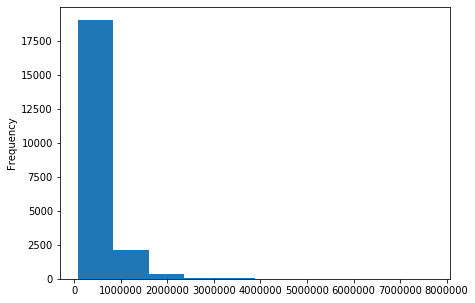

In [16]:
#distribution of house sale price
house_sales2['price'].plot(kind='hist', figsize=(7,5))

### PC 1

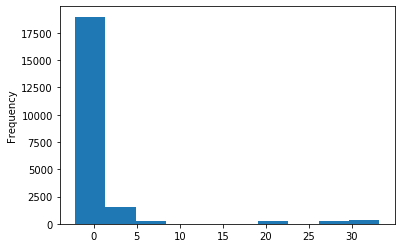

In [74]:
house_sales2['principal component 1'].plot(kind='hist')

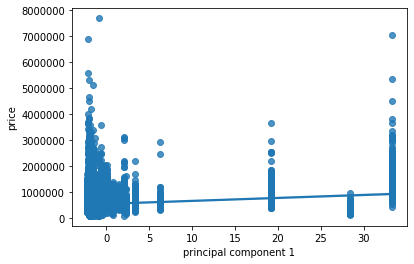

In [12]:
sns.regplot(x='principal component 1', y='price', data=house_sales2) 

In [248]:
# create categories of PCA 1
bins=np.linspace(min(house_sales2['principal component 1']),max(house_sales2['principal component 1']),3)
group_names=['Low principal component 1','High principal component 1']
house_sales2['PCA 1']=pd.cut(house_sales2['principal component 1'], bins, labels=group_names, 
                                             include_lowest=True)

In [249]:
bins

array([-2.1761041 , 15.51962187, 33.21534784])

In [250]:
#create dummies
dummy=pd.get_dummies(house_sales2['PCA 1'])
dummy

,Low principal component 1,High principal component 1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21608,1,0
21609,1,0
21610,1,0
21611,1,0


In [251]:
house_sales2=pd.concat([house_sales2,dummy],axis=1)
house_sales2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Medium principal component 2,High principal component 2,PCA 3,Low principal component 3,High principal component 3,PCA 4,Low principal component 4,High principal component 4,Low principal component 1,High principal component 1
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,0,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
21609,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
21610,3262300485,20150421T000000,2250000.0,5,5.25,3410,8118,2.0,0,0,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0
21611,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,1,...,1,0,Low principal component 3,1,0,Low principal component 4,1,0,1,0


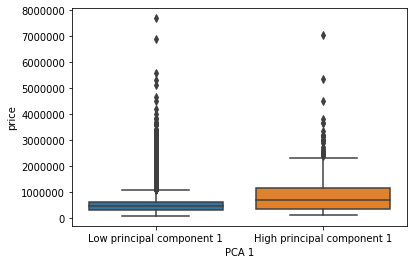

In [252]:
sns.boxplot(x='PCA 1', y='price', data=house_sales2)

In [80]:
house_sales2.groupby('PCA 1').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Wine Shop,Wings Joint,Women's Store,Yoga Studio,principal component 1,principal component 2,principal component 3,principal component 4,Not principal component 1,Principal component 1
PCA 1,,,,,,,,,,,,,,,,,,,,,
Not principal component 1,20787,20787,20787,20787,20787,20787,20787,20787,20787,20787,...,20787,20787,20787,20787,20787,20787,20787,20787,20787,20787
Principal component 1,826,826,826,826,826,826,826,826,826,826,...,826,826,826,826,826,826,826,826,826,826


Where are the houses with high values on PC 1 located?

In [105]:
house_sales2[['lat_x']]

,lat_x
0,47.5112
1,47.5009
2,47.5091
3,47.5053
4,47.5048
...,...
21608,47.6177
21609,47.6209
21610,47.6295
21611,47.6102


In [108]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [106]:
# find latitude and longitude values for King County
address = 'King County, WA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [114]:
#select houses with high pc1
map_data=house_sales2.loc[house_sales2['Principal component 1']==1]

### PC 2

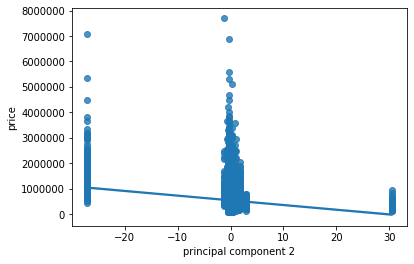

In [109]:
sns.regplot(x='principal component 2', y='price', data=house_sales2) 

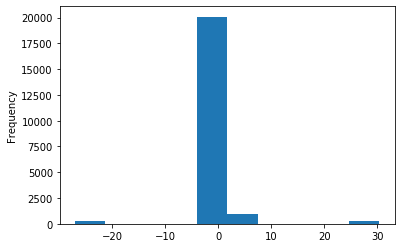

In [81]:
house_sales2['principal component 2'].plot(kind='hist')

In [82]:
# create categories of PCA2
bins=np.linspace(min(house_sales2['principal component 2']),max(house_sales2['principal component 2']),4)
group_names=['Low principal component 2','Medium principal component 2','High principal component 2']
house_sales2['PCA 2']=pd.cut(house_sales2['principal component 2'], bins, labels=group_names, 
                                             include_lowest=True)

In [6]:
bins

array([-27.04677927,  -7.89088204,  11.26501519,  30.42091242])

In [7]:
house_sales2.groupby('PCA 2').count()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,Principal component 1,Low principal component 2,Medium principal component 2,High principal component 2,PCA 3,Low principal component 3,High principal component 3,PCA 4,Low principal component 4,High principal component 4
PCA 2,,,,,,,,,,,,,,,,,,,,,
Low,317,317,317,317,317,317,317,317,317,317,...,317,317,317,317,317,317,317,317,317,317
Medium,21016,21016,21016,21016,21016,21016,21016,21016,21016,21016,...,21016,21016,21016,21016,21016,21016,21016,21016,21016,21016
High,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280


In [9]:
#create dummies
dummy=pd.get_dummies(house_sales2['PCA 2'])
dummy

,Low,Medium,High
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
21608,0,1,0
21609,0,1,0
21610,0,1,0
21611,0,1,0


In [10]:
house_sales2=pd.concat([house_sales2,dummy],axis=1)
house_sales2

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,High principal component 2,PCA 3,Low principal component 3,High principal component 3,PCA 4,Low principal component 4,High principal component 4,Low,Medium,High
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
1,1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
2,2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
3,3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
4,4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
21609,21609,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
21610,21610,3262300485,20150421T000000,2250000.0,5,5.25,3410,8118,2.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0
21611,21611,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,...,0,Low principal component 3,1,0,Low principal component 4,1,0,0,1,0


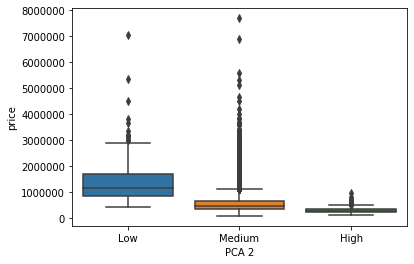

In [11]:
sns.boxplot(x='PCA 2', y='price', data=house_sales2)

### PCA 3

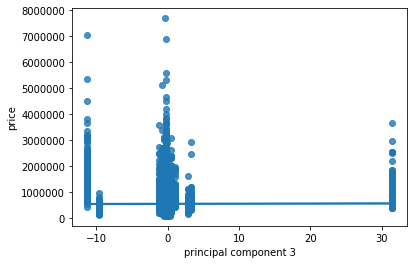

In [111]:
sns.regplot(x='principal component 3', y='price', data=house_sales2) 

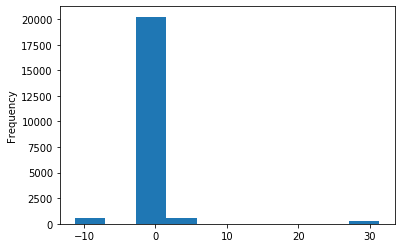

In [88]:
house_sales2['principal component 3'].plot(kind='hist')

In [89]:
# create categories of PCA3
bins=np.linspace(min(house_sales2['principal component 3']),max(house_sales2['principal component 3']),3)
#bins=(-11.24320303,-5,10,31.37949177)
group_names=['Low principal component 3','High principal component 3']
house_sales2['PCA 3']=pd.cut(house_sales2['principal component 3'], bins, labels=group_names, 
                                             include_lowest=True)

In [90]:
bins

array([-11.24320303,  10.06814437,  31.37949177])

In [91]:
house_sales2.groupby('PCA 3').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,principal component 2,principal component 3,principal component 4,PCA 1,Not principal component 1,Principal component 1,PCA 2,Low principal component 2,Medium principal component 2,High principal component 2
PCA 3,,,,,,,,,,,,,,,,,,,,,
Low principal component 3,21384,21384,21384,21384,21384,21384,21384,21384,21384,21384,...,21384,21384,21384,21384,21384,21384,21384,21384,21384,21384
High principal component 3,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229


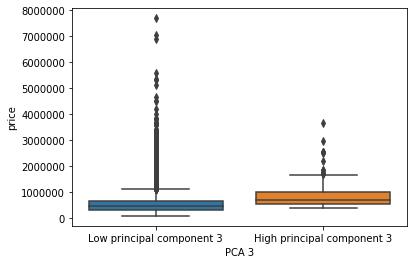

In [92]:
sns.boxplot(x='PCA 3', y='price', data=house_sales2)

In [93]:
#create dummies
dummy=pd.get_dummies(house_sales2['PCA 3'])
dummy

,Low principal component 3,High principal component 3
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21608,1,0
21609,1,0
21610,1,0
21611,1,0


In [94]:
house_sales2=pd.concat([house_sales2,dummy],axis=1)
house_sales2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,PCA 1,Not principal component 1,Principal component 1,PCA 2,Low principal component 2,Medium principal component 2,High principal component 2,PCA 3,Low principal component 3,High principal component 3
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,0,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
21609,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
21610,3262300485,20150421T000000,2250000.0,5,5.25,3410,8118,2.0,0,0,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0
21611,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,1,...,Not principal component 1,1,0,Medium principal component 2,0,1,0,Low principal component 3,1,0


### PCA 4

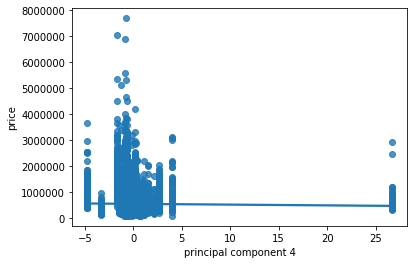

In [112]:
sns.regplot(x='principal component 4', y='price', data=house_sales2) 

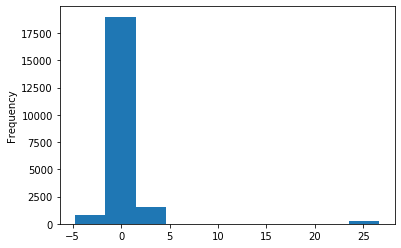

In [95]:
house_sales2['principal component 4'].plot(kind='hist')

In [96]:
# create categories of PCA4
bins=np.linspace(min(house_sales2['principal component 4']),max(house_sales2['principal component 4']),3)
group_names=['Low principal component 4','High principal component 4']
house_sales2['PCA 4']=pd.cut(house_sales2['principal component 4'], bins, labels=group_names, 
                                             include_lowest=True)

In [98]:
house_sales2.groupby('PCA 4').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,PCA 1,Not principal component 1,Principal component 1,PCA 2,Low principal component 2,Medium principal component 2,High principal component 2,PCA 3,Low principal component 3,High principal component 3
PCA 4,,,,,,,,,,,,,,,,,,,,,
Low principal component 4,21347,21347,21347,21347,21347,21347,21347,21347,21347,21347,...,21347,21347,21347,21347,21347,21347,21347,21347,21347,21347
High principal component 4,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,266,266,266,266,266,266


In [99]:
#create dummies
dummy=pd.get_dummies(house_sales2['PCA 4'])
dummy

,Low principal component 4,High principal component 4
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21608,1,0
21609,1,0
21610,1,0
21611,1,0


In [100]:
house_sales2=pd.concat([house_sales2,dummy],axis=1)
house_sales2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,PCA 2,Low principal component 2,Medium principal component 2,High principal component 2,PCA 3,Low principal component 3,High principal component 3,PCA 4,Low principal component 4,High principal component 4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,0,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
21609,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
21610,3262300485,20150421T000000,2250000.0,5,5.25,3410,8118,2.0,0,0,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0
21611,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,1,...,Medium principal component 2,0,1,0,Low principal component 3,1,0,Low principal component 4,1,0


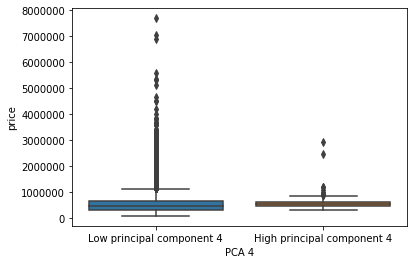

In [101]:
sns.boxplot(x='PCA 4', y='price', data=house_sales2)

### Square foot living area

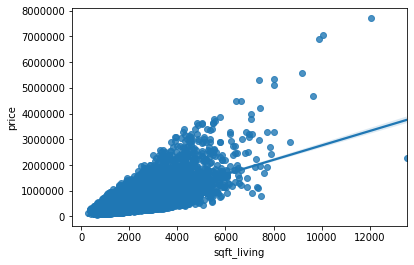

In [17]:
sns.regplot(x='sqft_living', y='price', data=house_sales2)

### Number of floors

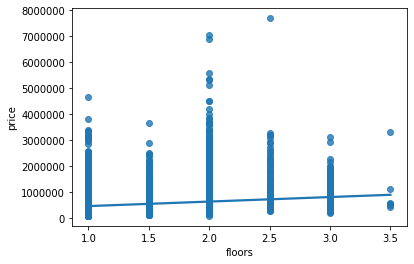

In [18]:
sns.regplot(x='floors', y='price', data=house_sales2)

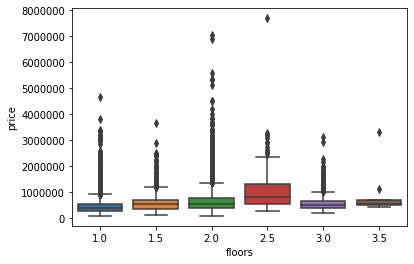

In [19]:
sns.boxplot(x='floors', y='price', data=house_sales2)

In [75]:
#create dummies
dummy=pd.get_dummies(house_sales2['floors'])
dummy

,1.0,1.5,2.0,2.5,3.0,3.5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
21608,0,0,1,0,0,0
21609,0,0,1,0,0,0
21610,0,0,1,0,0,0
21611,0,0,1,0,0,0


In [78]:
#rename dummies
dummy.rename(columns={1.0: "Floors_1.0", 1.5: "Floors_1.5",2.0: "Floors_2.0",2.5: "Floors_2.5"
                      ,3.0: "Floors_3.0",3.5: "Floors_3.5"},inplace=True)

In [79]:
# add dummies to data set
house_sales2=pd.concat([house_sales2,dummy],axis=1)
house_sales2

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,2.0,2.5,3.0,3.5,Floors_1.0,Floors_1.5,Floors_2.0,Floors_2.5,Floors_3.0,Floors_3.5
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,...,1,0,0,0,0,0,1,0,0,0
21609,21609,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,...,1,0,0,0,0,0,1,0,0,0
21610,21610,3262300485,20150421T000000,2250000.0,5,5.25,3410,8118,2.0,0,...,1,0,0,0,0,0,1,0,0,0
21611,21611,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,...,1,0,0,0,0,0,1,0,0,0


### View

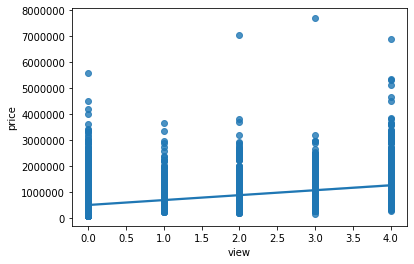

In [24]:
sns.regplot(x='view', y='price', data=house_sales2)

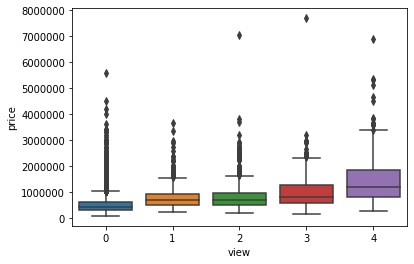

In [28]:
sns.boxplot(x='view', y='price', data=house_sales2)

In [65]:
#create dummies
dummy=pd.get_dummies(house_sales2['view'])
dummy

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21608,1,0,0,0,0
21609,1,0,0,0,0
21610,1,0,0,0,0
21611,0,1,0,0,0


In [71]:
#rename dummies
dummy.rename(columns={0: "View_0", 1: "View_1",2: "View_2",3: "View_3",4: "View_4"},inplace=True)

In [72]:
# add dummies to data set
house_sales2=pd.concat([house_sales2,dummy],axis=1)
house_sales2

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,0,1,2,3,4,View_0,View_1,View_2,View_3,View_4
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,...,1,0,0,0,0,1,0,0,0,0
2,2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,...,1,0,0,0,0,1,0,0,0,0
21609,21609,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,...,1,0,0,0,0,1,0,0,0,0
21610,21610,3262300485,20150421T000000,2250000.0,5,5.25,3410,8118,2.0,0,...,1,0,0,0,0,1,0,0,0,0
21611,21611,6447300365,20141113T000000,2900000.0,5,4.00,5190,14600,2.0,0,...,0,1,0,0,0,0,1,0,0,0


### Waterfront

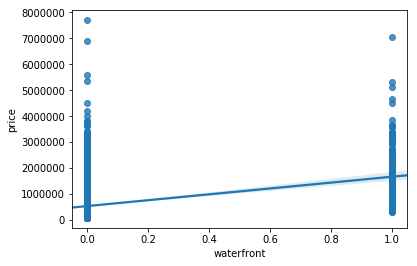

In [102]:
sns.regplot(x='waterfront', y='price', data=house_sales2)

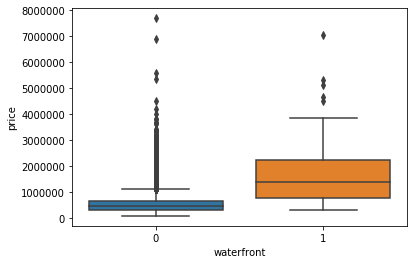

In [262]:
sns.boxplot(x='waterfront', y='price', data=house_sales2)

## Correlations

In [103]:
#correlations
correlation_matrix=house_sales2.corr()

In [104]:
correlation_matrix.head(150)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,principal component 4,Not principal component 1,Principal component 1,Low principal component 2,Medium principal component 2,High principal component 2,Low principal component 3,High principal component 3,Low principal component 4,High principal component 4
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.048156,-0.010742,0.010742,-0.007892,0.003209,0.003739,-0.025251,0.025251,0.050092,-0.050092
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,-0.025538,-0.173317,0.173317,0.271131,-0.145917,-0.076761,-0.090974,0.090974,-0.011848,0.011848
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,-0.057976,-0.051296,0.051296,0.063499,-0.045414,-0.001687,-0.023360,0.023360,0.044961,-0.044961
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,-0.035972,-0.038296,0.038296,0.065403,-0.041053,-0.010032,-0.005997,0.005997,0.010095,-0.010095
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,-0.090835,-0.062206,0.062206,0.110143,-0.067795,-0.018838,-0.007964,0.007964,0.060814,-0.060814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Middle Eastern Restaurant,0.016090,-0.026754,-0.025179,-0.053419,-0.050630,-0.024958,-0.030254,0.015320,0.003955,-0.014524,...,0.065099,0.027720,-0.027720,-0.016966,0.023437,-0.015931,0.014390,-0.014390,0.015523,-0.015523
Mini Golf,0.072468,0.029947,-0.025746,-0.007587,-0.037440,-0.032656,0.060808,-0.010166,-0.003646,-0.018375,...,0.092966,0.023247,-0.023247,-0.014228,0.019656,-0.013361,0.012068,-0.012068,0.013018,-0.013018
Miscellaneous Shop,0.003739,-0.076761,-0.001687,-0.010032,-0.018838,-0.012458,-0.038953,-0.009987,-0.002993,-0.006690,...,-0.120808,-0.574723,0.574723,-0.013978,-0.679737,1.000000,0.011856,-0.011856,0.012789,-0.012789
Mobile Phone Shop,-0.001108,0.087134,-0.000036,-0.012289,-0.003245,-0.040339,-0.033206,-0.014633,-0.000138,0.029200,...,-0.143930,-0.808803,0.808803,0.362083,-0.754297,0.708270,-0.307115,0.307115,0.027543,-0.027543


In [229]:
#correlations
house_sales2[['price','principal component 1','principal component 2','principal component 3'
              ,'principal component 4', 'Not principal component 1'
              ,'Principal component 1','Low principal component 2','Medium principal component 2','High principal component 2'
              ,'Low principal component 3','High principal component 3'
              ,'Low principal component 4','High principal component 4'
             ]].corr()

,price,principal component 1,principal component 2,principal component 3,principal component 4,Not principal component 1,Principal component 1,Low principal component 2,Medium principal component 2,High principal component 2,Low principal component 3,High principal component 3,Low principal component 4,High principal component 4
price,1.000000,0.181715,-0.242274,0.005370,-0.025538,-0.173317,0.173317,0.271131,-0.145917,-0.076761,-0.090974,0.090974,-0.011848,0.011848
principal component 1,0.181715,1.000000,-0.051565,-0.096482,0.011701,-0.947491,0.947491,0.695724,-0.895604,0.558372,-0.340624,0.340624,-0.119492,0.119492
principal component 2,-0.242274,-0.051565,1.000000,0.030087,0.006002,0.010804,-0.010804,-0.685536,0.003819,0.723258,0.014117,-0.014117,-0.025713,0.025713
principal component 3,0.005370,-0.096482,0.030087,1.000000,0.024991,-0.067993,0.067993,-0.363548,0.467491,-0.291045,-0.875612,0.875612,-0.104486,0.104486
principal component 4,-0.025538,0.011701,0.006002,0.024991,1.000000,0.195654,-0.195654,-0.066240,0.131945,-0.120808,0.155164,-0.155164,-0.926220,0.926220
Not principal component 1,-0.173317,-0.947491,0.010804,-0.067993,0.195654,1.000000,-1.000000,-0.612049,0.845509,-0.574723,0.519134,-0.519134,-0.022252,0.022252
Principal component 1,0.173317,0.947491,-0.010804,0.067993,-0.195654,-1.000000,1.000000,0.612049,-0.845509,0.574723,-0.519134,0.519134,0.022252,-0.022252
Low principal component 2,0.271131,0.695724,-0.685536,-0.363548,-0.066240,-0.612049,0.612049,1.000000,-0.723883,-0.013978,0.012626,-0.012626,0.013619,-0.013619
Medium principal component 2,-0.145917,-0.895604,0.003819,0.467491,0.131945,0.845509,-0.845509,-0.723883,1.000000,-0.679737,-0.017442,0.017442,-0.018814,0.018814
High principal component 2,-0.076761,0.558372,0.723258,-0.291045,-0.120808,-0.574723,0.574723,-0.013978,-0.679737,1.000000,0.011856,-0.011856,0.012789,-0.012789


## Predictive modelling

#### Split dataset in to training and testing datasets

In [86]:
y_data = house_sales2['price']
x_data=house_sales2.drop('price',axis=1)

In [87]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


In [88]:
x_train

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,2.0,2.5,3.0,3.5,Floors_1.0,Floors_1.5,Floors_2.0,Floors_2.5,Floors_3.0,Floors_3.5
17801,17801,7852120120,20140620T000000,3,3.50,3690,8837,2.0,0,0,...,1,0,0,0,0,0,1,0,0,0
20764,20764,9517200030,20140625T000000,3,2.00,1410,9600,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2285,2285,7943000020,20150326T000000,2,1.00,760,7272,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
13350,13350,1498303905,20150402T000000,4,1.50,1980,3240,1.5,0,0,...,0,0,0,0,0,1,0,0,0,0
19376,19376,1236900090,20140915T000000,3,1.00,1060,12690,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,10955,9211520400,20141104T000000,4,1.75,1840,10528,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
17289,17289,1139000685,20140729T000000,4,2.75,2330,6703,1.5,0,0,...,0,0,0,0,0,1,0,0,0,0
5192,5192,8032700010,20140716T000000,3,2.50,1730,3000,2.0,0,0,...,1,0,0,0,0,0,1,0,0,0
12172,12172,259600560,20140827T000000,3,1.00,1220,7771,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
#save data
x_train.to_csv(r'C:\Users\Elin\Documents\Applied Data Science Specialization in Python\Capstone project\x_train.csv')
x_test.to_csv(r'C:\Users\Elin\Documents\Applied Data Science Specialization in Python\Capstone project\x_test.csv')
y_train.to_csv(r'C:\Users\Elin\Documents\Applied Data Science Specialization in Python\Capstone project\y_train.csv')
y_test.to_csv(r'C:\Users\Elin\Documents\Applied Data Science Specialization in Python\Capstone project\y_test.csv')


In [32]:
from sklearn.linear_model import LinearRegression

In [108]:
lm = LinearRegression()
lm.fit(x_train[['sqft_living','waterfront'
                ,"View_1","View_2","View_3","View_4"
                ,"Floors_1.5", "Floors_2.0","Floors_2.5","Floors_3.0","Floors_3.5"
                             ,'Principal component 1' 
                               ,'Low principal component 2', 'Medium principal component 2'
                  ]],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
yhat_train=lm.predict(x_train[['sqft_living','waterfront'
                                  ,"View_1","View_2","View_3","View_4"
                ,"Floors_1.5", "Floors_2.0","Floors_2.5","Floors_3.0","Floors_3.5"
                              ,'Principal component 1' 
                               ,'Low principal component 2', 'Medium principal component 2'
                               ]])
yhat_train

array([891181.09291109, 332829.13243754, -10830.66788635, ...,
       406602.26741078, 285854.65445537, 434038.83679271])

In [110]:
yhat_test=lm.predict(x_test[['sqft_living','waterfront'
                             ,"View_1","View_2","View_3","View_4"
                ,"Floors_1.5", "Floors_2.0","Floors_2.5","Floors_3.0","Floors_3.5"
                                ,'Principal component 1' 
                               ,'Low principal component 2', 'Medium principal component 2'
                             ]])
yhat_test

array([367441.90568756, 481013.31477489, 788084.47544495, ...,
       532691.65567872, 453973.83881261, 362497.2237947 ])

In [111]:
lm.intercept_

-489492.23035822774

In [112]:
lm.coef_

array([ 2.47234095e+02,  5.02731330e+05,  1.57784283e+05,  1.19850361e+05,
        2.07197067e+05,  4.02652742e+05,  6.65969311e+04, -5.34177531e+03,
        2.46414664e+05,  1.19167595e+05,  3.01002296e+05,  2.90763651e+05,
        7.90288548e+05,  4.73721289e+05])

In [113]:
lm.score(x_train[['sqft_living','waterfront'
                  ,"View_1","View_2","View_3","View_4"
                ,"Floors_1.5", "Floors_2.0","Floors_2.5","Floors_3.0","Floors_3.5"
                    ,'Principal component 1' 
                               ,'Low principal component 2', 'Medium principal component 2'
                 ]],y_train)

0.6118998202669975

In [114]:
lm.score(x_test[['sqft_living','waterfront'
                 ,"View_1","View_2","View_3","View_4"
                ,"Floors_1.5", "Floors_2.0","Floors_2.5","Floors_3.0","Floors_3.5"
                 ,'Principal component 1' 
                              ,'Low principal component 2', 'Medium principal component 2'
                ]],y_test)

0.6117034501032481

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Houses')

    plt.show()
    plt.close()

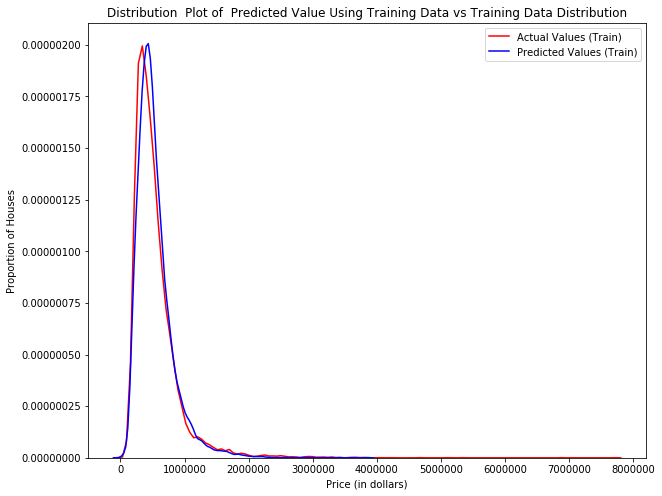

In [115]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

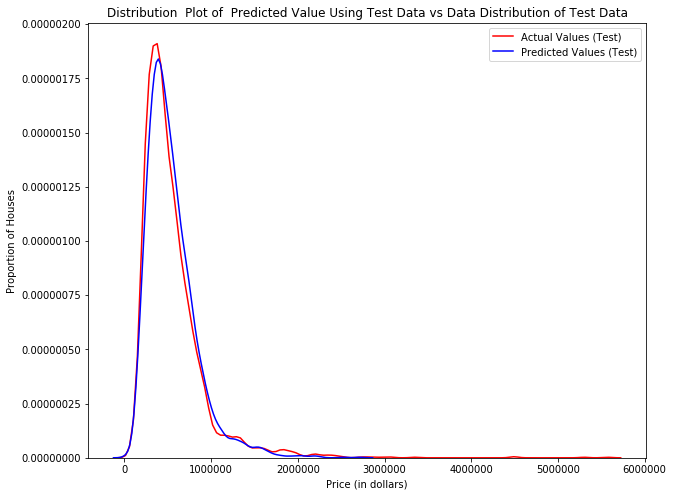

In [116]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)